In [1]:
from flash_ansr import FlashANSR, GenerationConfig, install_model, get_path
 
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
from drawdata import ScatterWidget

In [3]:
MODEL = "psaegert/flash-ansr-v21.0-60M"

In [4]:
install_model(MODEL)

Installing model psaegert/flash-ansr-v21.0-60M to /home/psaegert/Projects/flash-ansr/models/psaegert/flash-ansr-v21.0-60M


Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

Model psaegert/flash-ansr-v21.0-60M installed successfully!


In [ ]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    # generation_config=GenerationConfig(method='beam_search', beam_width=128 * 16, equivalence_pruning=True),
    # generation_config=GenerationConfig(method='softmax_sampling', choices=1024 * 32, max_len=32),
    generation_config=GenerationConfig(method='mcts', beam_width=128, simulations=1024 * 32, temperature=1, uct_c=2.0),
    parsimony=0.02
).to(device)

In [6]:
widget = ScatterWidget()
widget

ScatterWidget()

In [8]:
X_raw, y_raw = widget.data_as_X_y

# Scale X_raw and y_raw to (-10, 10)
X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0)) * 20 - 10
y = (y_raw - y_raw.min(axis=0)) / (y_raw.max(axis=0) - y_raw.min(axis=0)) * 20 - 10

In [9]:
nsr.fit(X, y, verbose=True)

Fitting Constants: 100%|██████████| 9022/9022 [00:17<00:00, 523.51it/s]


In [10]:
nsr.compile_results(parsimony=0.02)

In [11]:
nsr.get_expression()

'542.42 * cos(2.1 + pow5(atan(x1))) / (-347.76 / (-1.86 + x1)) - 1.1'

In [12]:
nsr.results

,log_prob,fvu,score,expression,complexity,target_complexity,numeric_prediction,raw_beam,beam,raw_beam_decoded,function,refiner,beam_id,fit_constants,fit_covariances,fit_loss
0,-22.004981,1.066846e-01,-0.651898,"[-, *, <constant>, /, cos, +, <constant>, pow5...",16,None,None,"[1, 16, 17, 6, 18, 32, 15, 6, 26, 36, 47, 18, ...","[16, 17, 6, 18, 32, 15, 6, 26, 36, 47, 18, 6, ...","[-, *, <constant>, /, cos, +, <constant>, pow5...",<function <lambda> at 0x71f783ba7e20>,"Refiner(expression=['-', '*', '<constant>', '/...",0,"[542.4174265493597, 2.1048844047624637, -347.7...","[[4.919625181735985e+18, 5094452.781713998, -3...",3.135219e+00
1,-18.507939,1.707165e-01,-0.427724,"[-, *, <constant>, -, sin, -, <constant>, x1, ...",17,None,None,"[1, 16, 17, 6, 16, 31, 16, 6, 47, 17, 6, 32, 1...","[16, 17, 6, 16, 31, 16, 6, 47, 17, 6, 32, 18, ...","[-, *, <constant>, -, sin, -, <constant>, x1, ...",<function <lambda> at 0x71f78ba3af20>,"Refiner(expression=['-', '*', '<constant>', '-...",1,"[3.5287514302100216, -1.663306437250623, -1.70...","[[0.07179924823317241, 2.5856811968623767e-05,...",5.016973e+00
2,-27.764126,1.796644e-01,-0.425538,"[-, -, *, <constant>, pow1_3, pow2, x1, *, +, ...",16,None,None,"[1, 16, 16, 17, 6, 28, 23, 47, 17, 15, 6, 47, ...","[16, 16, 17, 6, 28, 23, 47, 17, 15, 6, 47, 32,...","[-, -, *, <constant>, pow1_3, pow2, x1, *, +, ...",<function <lambda> at 0x71f7886442c0>,"Refiner(expression=['-', '-', '*', '<constant>...",2,"[8.580688704232287, -15.122576115805389, -0.41...","[[0.3878738771997104, -0.6069759931836938, 0.0...",5.279932e+00
3,-32.232293,1.724153e-01,-0.423424,"[-, -, *, <constant>, *, <constant>, cos, x1, ...",17,None,None,"[1, 16, 16, 17, 6, 17, 6, 32, 47, 17, 6, 32, 1...","[16, 16, 17, 6, 17, 6, 32, 47, 17, 6, 32, 16, ...","[-, -, *, <constant>, *, <constant>, cos, x1, ...",<function <lambda> at 0x71f783d87380>,"Refiner(expression=['-', '-', '*', '<constant>...",3,"[-0.8805394815304484, 3.9919528190514963, 5.94...","[[6404982438243.511, 29259055828747.633, -1593...",5.066895e+00
4,-23.544300,1.915286e-01,-0.377766,"[*, <constant>, +, <constant>, +, cos, x1, *, ...",17,None,None,"[1, 17, 6, 15, 6, 15, 32, 47, 17, 18, 47, 6, 3...","[17, 6, 15, 6, 15, 32, 47, 17, 18, 47, 6, 32, ...","[*, <constant>, +, <constant>, +, cos, x1, *, ...",<function <lambda> at 0x71f7906d1300>,"Refiner(expression=['*', '<constant>', '+', '<...",4,"[-3.023479582208184, 0.016512514374794358, 2.4...","[[0.09166353551526046, -0.007114330584425059, ...",5.628592e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,-21.345196,6.859312e+05,6.116281,"[-, -, inv, exp, x1, *, <constant>, cos, -, x1...",14,None,None,"[1, 16, 16, 20, 37, 47, 17, 6, 32, 16, 47, 28,...","[16, 16, 20, 37, 47, 17, 6, 32, 16, 47, 28, 37...","[-, -, inv, exp, x1, *, <constant>, cos, -, x1...",<function <lambda> at 0x71f7918958a0>,"Refiner(expression=['-', '-', 'inv', 'exp', 'x...",8640,"[-2192.47457253656, 1550.6189320219612]","[[230940.51418039453, 8095.041159871612], [809...",2.015797e+07
8641,-33.682067,7.589263e+05,6.120200,"[-, <constant>, pow5, -, -, x1, /, x1, <consta...",12,None,None,"[1, 16, 6, 26, 16, 16, 47, 18, 47, 6, 24, 36, ...","[16, 6, 26, 16, 16, 47, 18, 47, 6, 24, 36, 47]","[-, <constant>, pow5, -, -, x1, /, x1, <consta...",<function <lambda> at 0x71f791894ea0>,"Refiner(expression=['-', '<constant>', 'pow5',...",8641,"[-272.8302673788236, -211135127.35121787]","[[149110.30969817995, 6122819998831348.0], [61...",2.230313e+07
8642,-46.218801,7.435300e+05,6.211299,"[-, -, *, <constant>, pow1_3, *, <constant>, x...",17,None,None,"[1, 16, 16, 17, 6, 28, 17, 6, 48, 20, 37, 47, ...","[16, 16, 17, 6, 28, 17, 6, 48, 20, 37, 47, 17,...","[-, -, *, <constant>, pow1_3, *, <constant>, x...",<function <lambda> at 0x71f79185a7a0>,"Refiner(expression=['-', '-', '*', '<constant>...",8642,"[0.27031219055043765, -0.22963911710717003, 27...","[[inf, inf, inf, inf], [inf, inf, inf, inf], [...",2.185067e+07
8643,-29.771404,1.045177e+12,12.3391

In [13]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [14]:
y_pred = [[nsr.predict(X, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]
y_pred_linspace = [[nsr.predict(X_linspace, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]

/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:130: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 3), x ** (1 / 3))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:173: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 5), x ** (1 / 5))


In [15]:
y_pred = y_pred[:32]
y_pred_linspace = y_pred_linspace[:32]

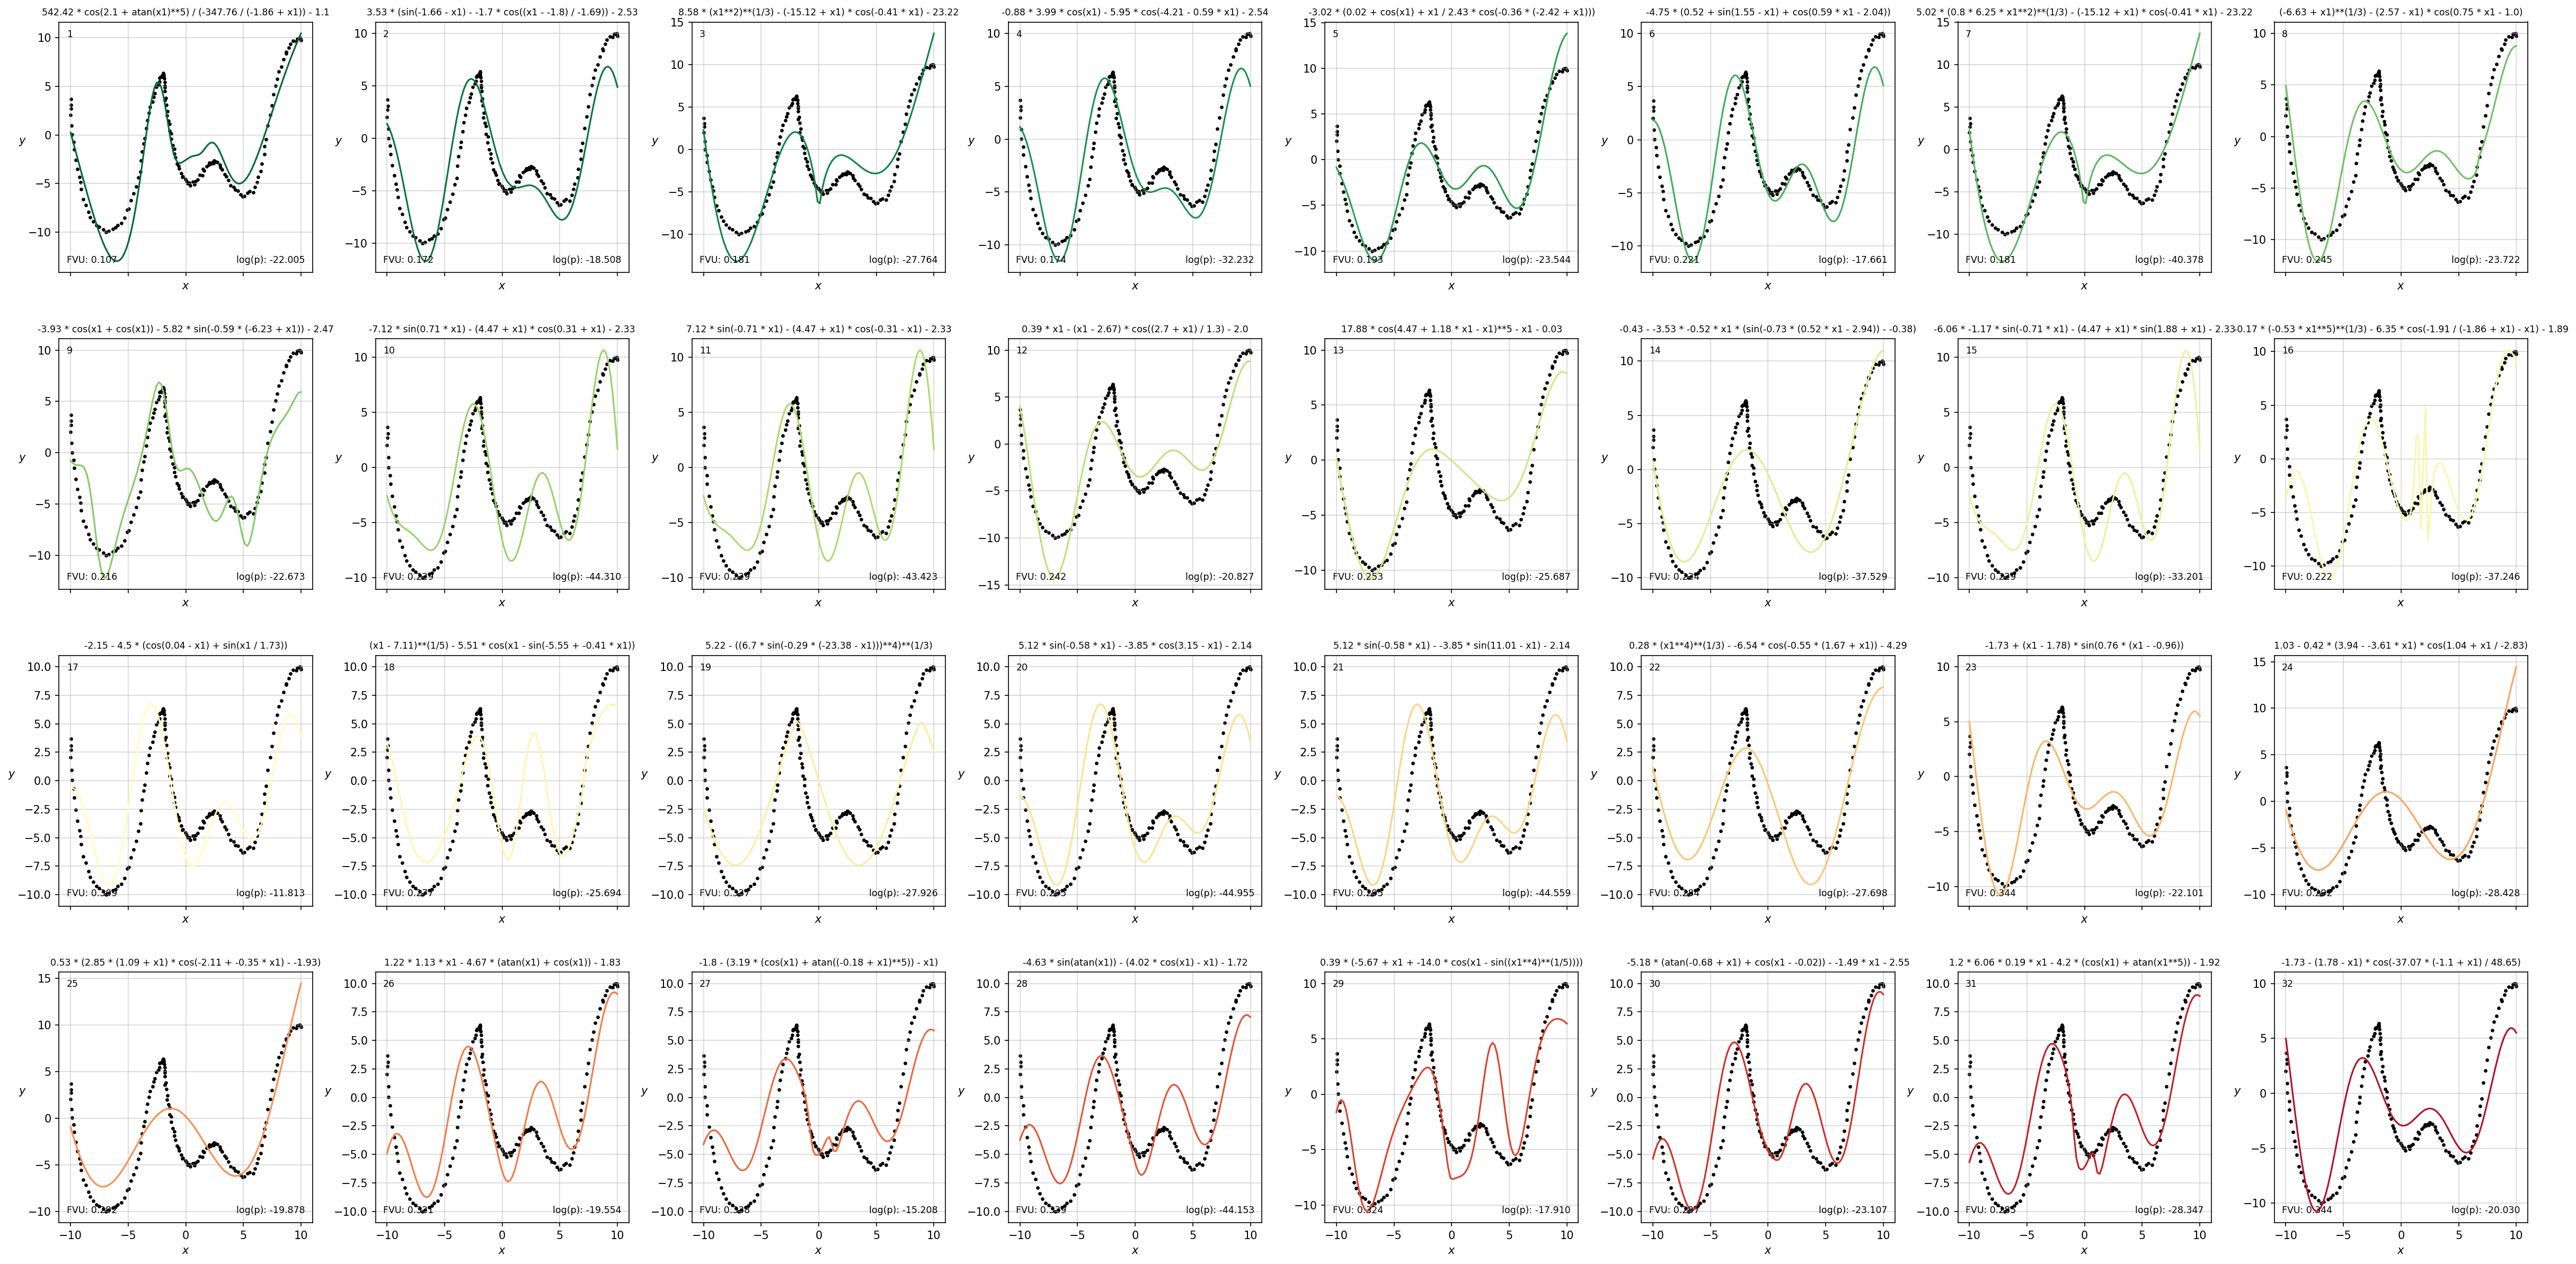

In [16]:
COLS = 8
ROWS = np.ceil(len(y_pred) / COLS).astype(int)

fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 4, ROWS * 4), dpi=150, sharex=True)

for i, ax in enumerate(axs.flat):
    if i >= len(y_pred) or len(y_pred[i]) == 0:
        ax.axis('off')
        continue
    fvu = np.mean((y_pred[i][0][:, 0] - y)**2) / np.var(y)
    expression_pred_transformed = nsr._results[i]['refiner'].transform(nsr._results[i]['expression'], 0, return_prefix=True)
    expression_pred_transformed_infix = nsr.simplipy_engine.prefix_to_infix(expression_pred_transformed, power='**')

    ax.plot(X_linspace, y_pred_linspace[i][0], color=plt.get_cmap('RdYlGn')(1 - i / len(y_pred)))
    ax.scatter(X, y, color='k', s=5)
    ax.set_title(expression_pred_transformed_infix, fontsize='small')
    
    ax.annotate(f'{i + 1}', xy=(0.03, 0.97), xycoords='axes fraction', ha='left', va='top', fontsize='small')
    ax.annotate(f'FVU: {fvu:.3f}', xy=(0.03, 0.03), xycoords='axes fraction', ha='left', va='bottom', fontsize='small')
    ax.annotate(f'log(p): {nsr._results[i]["log_prob"]:.3f}', xy=(0.97, 0.03), xycoords='axes fraction', ha='right', va='bottom', fontsize='small')

    ax.grid(alpha=0.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$', rotation=0, labelpad=5)

fig.tight_layout(h_pad=3)

Text(0, 0.5, 'Log Probability')

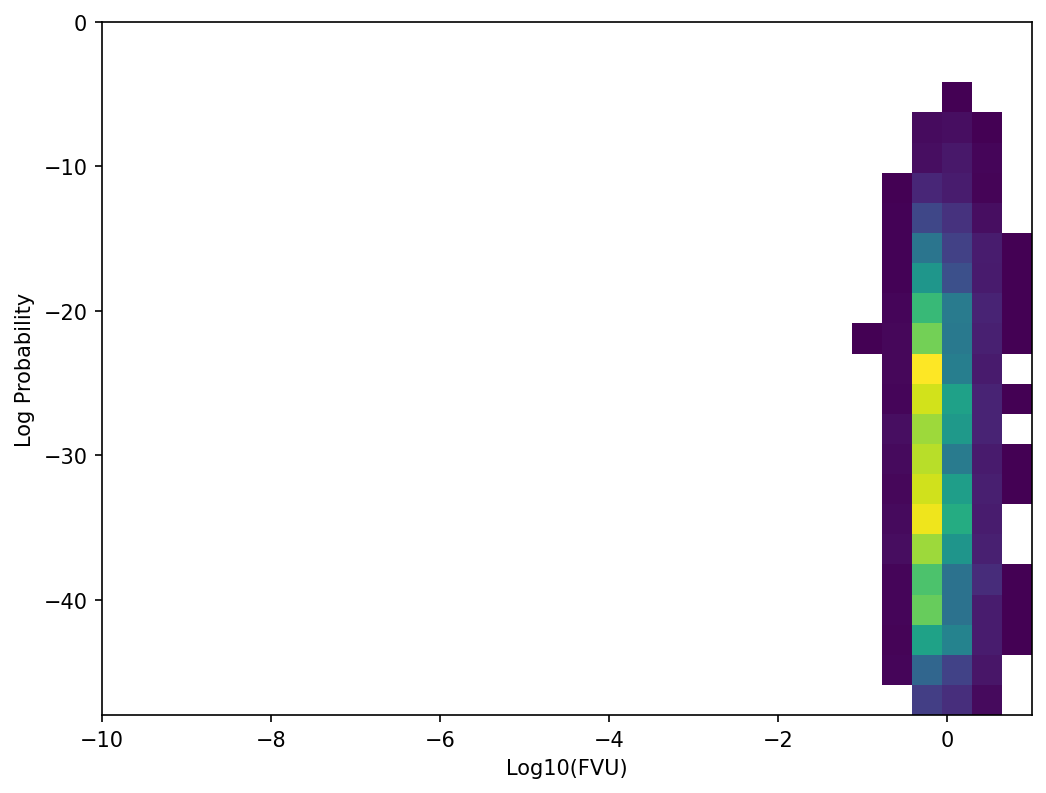

In [17]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['log_prob'], bins=(np.linspace(-10, 1, 32), np.linspace(-48, 0, 24)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Log Probability')

Text(0, 0.5, 'Log Probability')

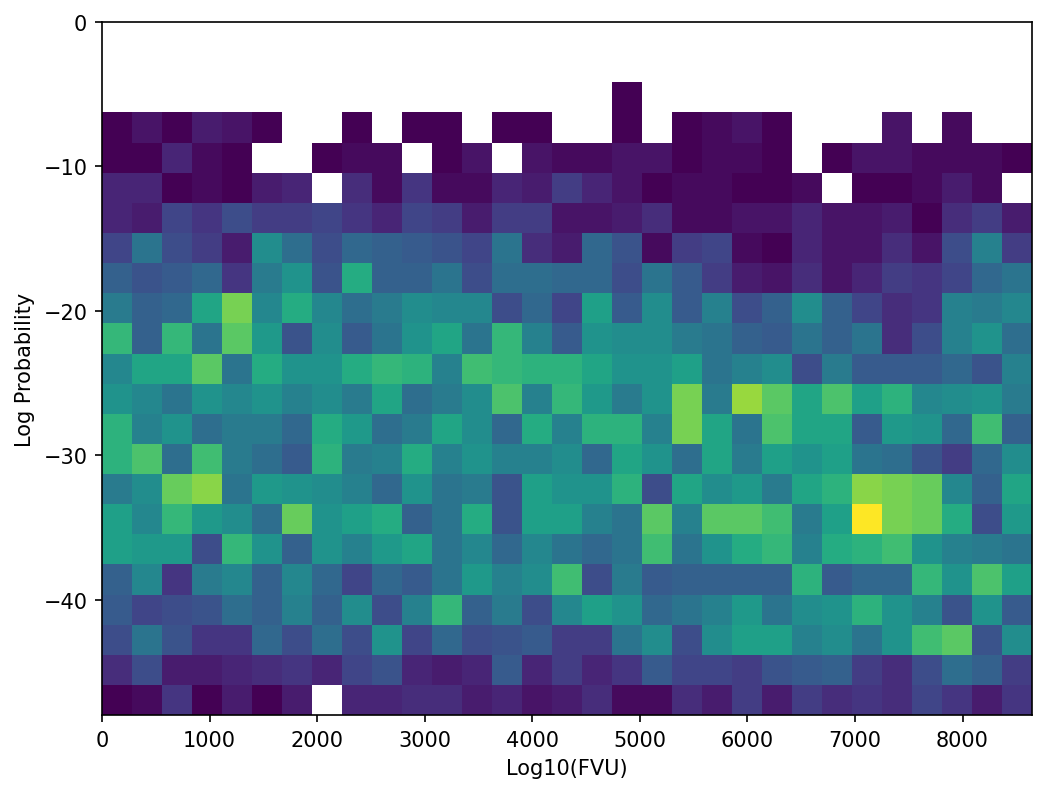

In [18]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.argsort(nsr.results['fvu']), nsr.results['log_prob'], bins=(np.linspace(-1, len(nsr.results), 32), np.linspace(-48, 0, 24)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Log Probability')

Text(0, 0.5, 'Complexity')

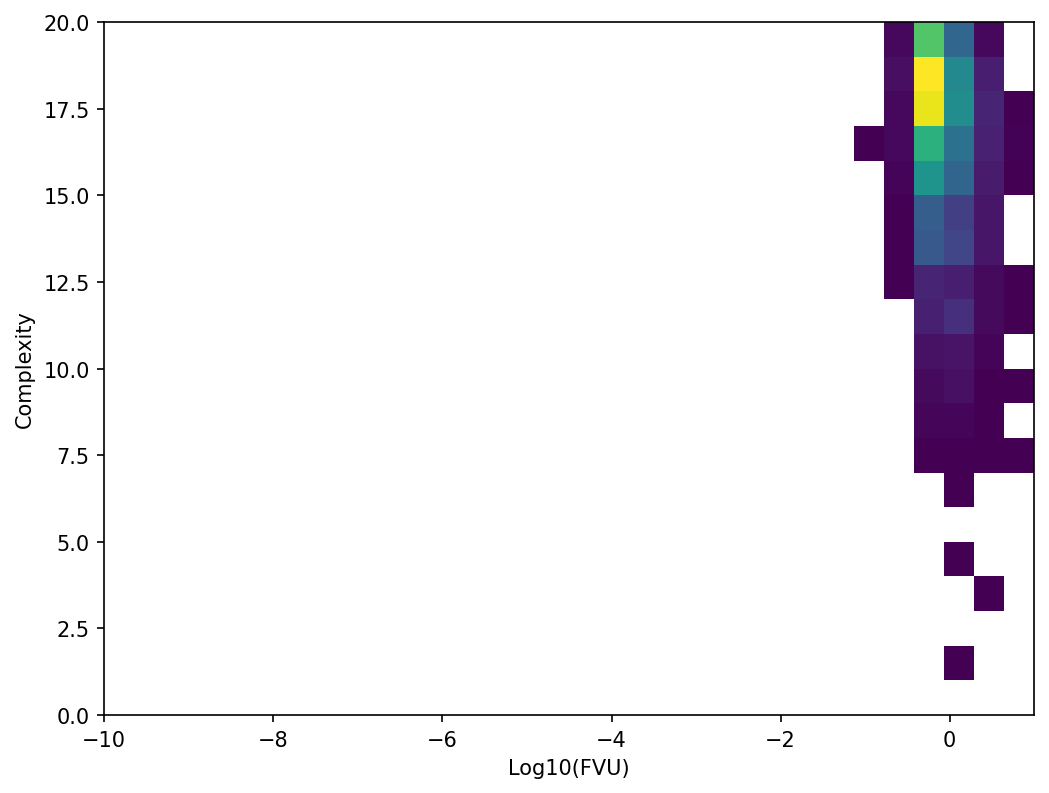

In [19]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['complexity'], bins=(np.linspace(-10, 1, 32), np.linspace(0, 20, 21)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Complexity')